## Background
The Titanic machine learning challenge has been published in Kaggle.com website as an introductory challenge to competitive data science. It is based on the infamous sinking of the RMS Titanic which killed 1502 out of 2224 passengers and crew in April 15, 1912. The aim of this challenge is to complete an analysis of what sort of what sorts of people were likely to survive. I need to predict if a passenger survived the sinking on the Titanic or not. I have been given a training set (train.csv) with 891 entries and a test set (test.csv). For each entry in the test set, I need to predict 0 if he didn't survive, or 1 if he did survive. The score is the percentage of passengers that I classified correctly. In order to complete the challenge, I have decided to try two models that are known as good classifiers: Logistic Regression and Support Vector Machine.

In [1]:
# Data analysis
import numpy as np
import pandas as pd
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration

In this section I have dedicated some efforts in getting to know the dataset. For each feature I wanted to learn it's priori probability and it's interaction with the dependant variable. I will first present the code and the graphs, and then analyze it.

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(train_df.info())
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams['figure.figsize'] = [16, 10]
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0     

In [3]:
# Survived
survived_df = pd.DataFrame(columns=['Label','Count','Probability'])
survived_df['Label'] = ("Not Survived", "Survived")
survived_df['Count'] = (list(train_df['Survived']).count(0), list(train_df['Survived']).count(1))
survived_df['Probability'] = (list(survived_df['Count'])[0]/sum(list(survived_df['Count'])), list(survived_df['Count'])[1]/sum(list(survived_df['Count'])))

survived_df


,Label,Count,Probability
0,Not Survived,549,0.616162
1,Survived,342,0.383838


### Survived
This is the dependent variable. In order to get a sense of its distribution, I have conducted a table. Here we can see that the dataset is a pretty good balance between being perfectly balanced and representing the problem. Here we can see that 38% of the entities survived the sinking, while we know that $\frac{2224-1502}{2224}=32.4\%$ of the people survived it, so we'll be able to say that it is a good representation of the problem.

In [4]:
pclass_df = pd.DataFrame(columns=['Label','Count','Probability'])
pclass_df['Label'] = ("1st", "2nd", "3rd")
pclass_df['Count'] = (list(train_df['Pclass']).count(1), list(train_df['Pclass']).count(2), list(train_df['Pclass']).count(3))
pclass_df['Probability'] = (list(pclass_df['Count'])[0]/sum(list(pclass_df['Count'])), list(pclass_df['Count'])[1]/sum(list(pclass_df['Count'])), list(pclass_df['Count'])[2]/sum(list(pclass_df['Count'])))
pclass_df

,Label,Count,Probability
0,1st,216,0.242424
1,2nd,184,0.206510
2,3rd,491,0.551066


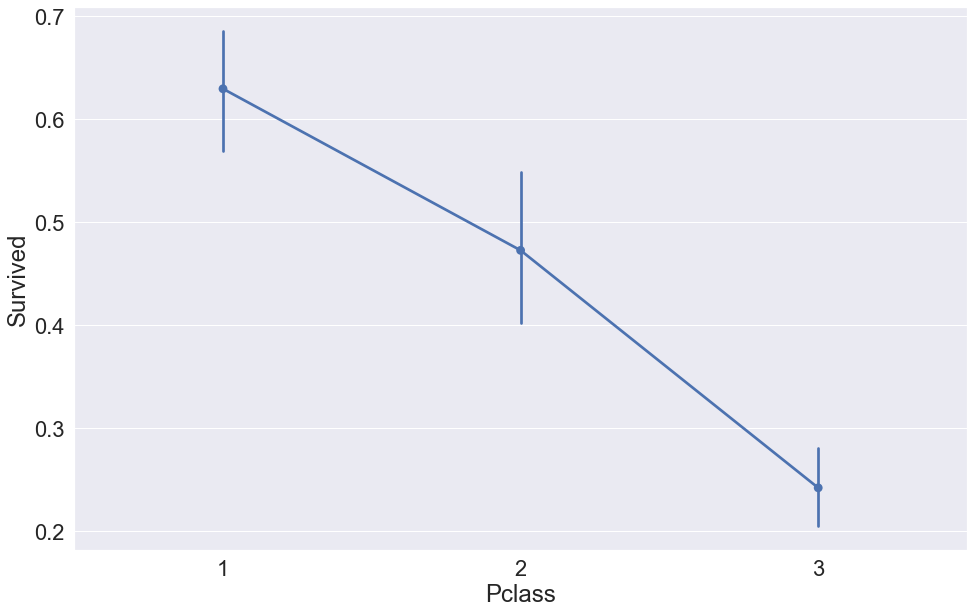

In [5]:
# Checking connection between class and survived
sns.set(font_scale=2)
sns.pointplot(x=train_df.Pclass, y=train_df.Survived);

### PClass

This feature represents the class of the ticket of the passenger. It is of a categorical type, and it can get three values: 1st, 2nd and 3rd class. Obviously, the 1st class passengers would be the ones who paid the most for their ticket and therefore enjoyed a more luxurious trip on board. Once again, I have prepared a probability table to get a sense of this feature's distribution. Here we can see that there are more entities which stayed in third class than in the rest of them combined. A short online research ([Wiki](https://en.wikipedia.org/wiki/RMS_Titanic)) shows that the ship could accommodate 833 first class passengers, 614 in second class, and 1006 in third class. In light of these facts, I believe that overall, this feature gets a good representation of the problem in this dataset.

I have also prepared a point plot, which is the favourite tool in seaborn library for plotting interactions bewteen variables. It represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication around that estimate using error bars. In this plot we can see a clear interaction between the two: the higher the passenger's class is – the higher it's chances of survival. We can also see a steep descending slope throughout the classes. The uncertainty around the 2nd class estimator is quite high. On the other hand, looking at the the 3rd class estimator we can see a lower amount of uncertainty, which makes us confident at the existence of interaction between the variables.

In [6]:
name_df = train_df.Name.str.split(expand = True)
train_df['Name'] = name_df[1]
print(train_df.Name.value_counts())


Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Major.            2
Mlle.             2
Gordon,           2
Col.              2
Carlo,            1
Ms.               1
Cruyssen,         1
Mme.              1
der               1
Messemaeker,      1
Billiard,         1
Don.              1
Velde,            1
Walle,            1
Melkebeke,        1
Mulder,           1
the               1
Shawah,           1
Capt.             1
Pelsmaeker,       1
Jonkheer.         1
Steen,            1
Name: Name, dtype: int64


In [7]:
train_df.loc[(train_df['Name'] != 'Mr.') & (train_df['Name'] != 'Mrs.') & (train_df['Name'] != 'Miss.') & (train_df['Name'] != 'Master.'), 'Name'] = 'Other'
print(train_df.Name.value_counts())

name_df = pd.DataFrame(columns=['Label','Count','Probability'])
name_df['Label'] = ("Mr.", "Mrs.", "Miss.", "Master.", "Other")
name_df['Count'] = (list(train_df['Name']).count('Mr.'), list(train_df['Name']).count('Mrs.'), list(train_df['Name']).count('Miss.'), list(train_df['Name']).count('Master.'), list(train_df['Name']).count('Other'))
name_df['Probability'] = (list(name_df['Count'])[0]/sum(list(name_df['Count'])), list(name_df['Count'])[1]/sum(list(name_df['Count'])), list(name_df['Count'])[2]/sum(list(name_df['Count'])), list(name_df['Count'])[3]/sum(list(name_df['Count'])), list(name_df['Count'])[4]/sum(list(name_df['Count'])))
name_df


Mr.        502
Miss.      179
Mrs.       121
Other       49
Master.     40
Name: Name, dtype: int64


,Label,Count,Probability
0,Mr.,502,0.563412
1,Mrs.,121,0.135802
2,Miss.,179,0.200898
3,Master.,40,0.044893
4,Other,49,0.054994


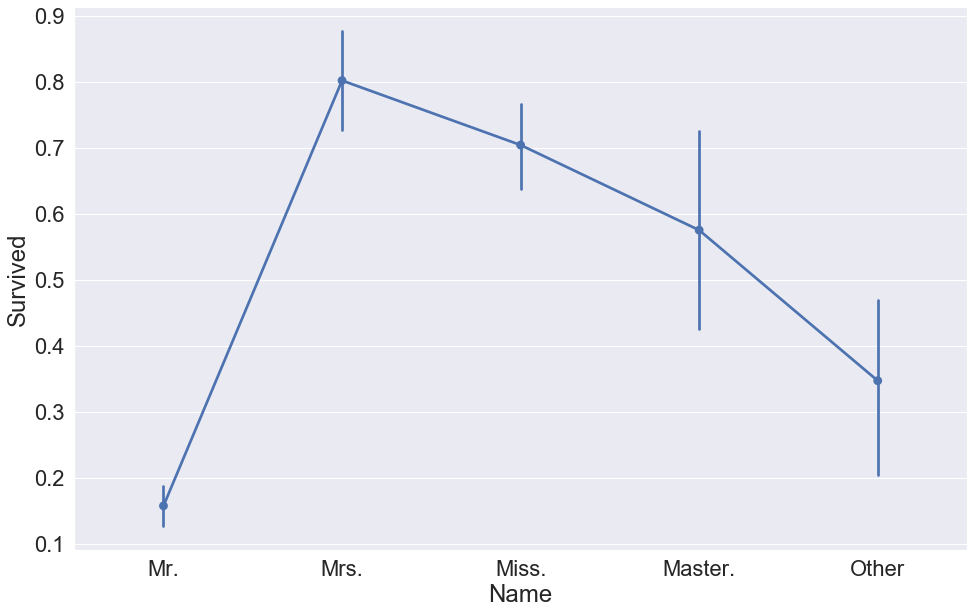

In [8]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.Name, y=train_df.Survived);

### Name

The name feature indicates the name of the passenger. The original form of this field is not informative since obviously each individual has a different name, so I won't be able to use it in order to train the model. I have noticed that this field also contains the titles of each individual, so I have decided to turn the "Name" feature into a categorical feautre that represents the title of the individual.

We can expect high correlation between this feature and the "Sex" feature, since the most common titles here describes the gender of the individual. We can also see the feminite titles got a higher survival rate than male titles.

In [9]:
sex_df = pd.DataFrame(columns=['Label','Count','Probability'])
sex_df['Label'] = ("Male", "Female")
sex_df['Count'] = (list(train_df['Sex']).count('male'), list(train_df['Sex']).count('female'))
sex_df['Probability'] = (list(sex_df['Count'])[0]/sum(list(sex_df['Count'])), list(sex_df['Count'])[1]/sum(list(sex_df['Count'])))
sex_df

,Label,Count,Probability
0,Male,577,0.647587
1,Female,314,0.352413


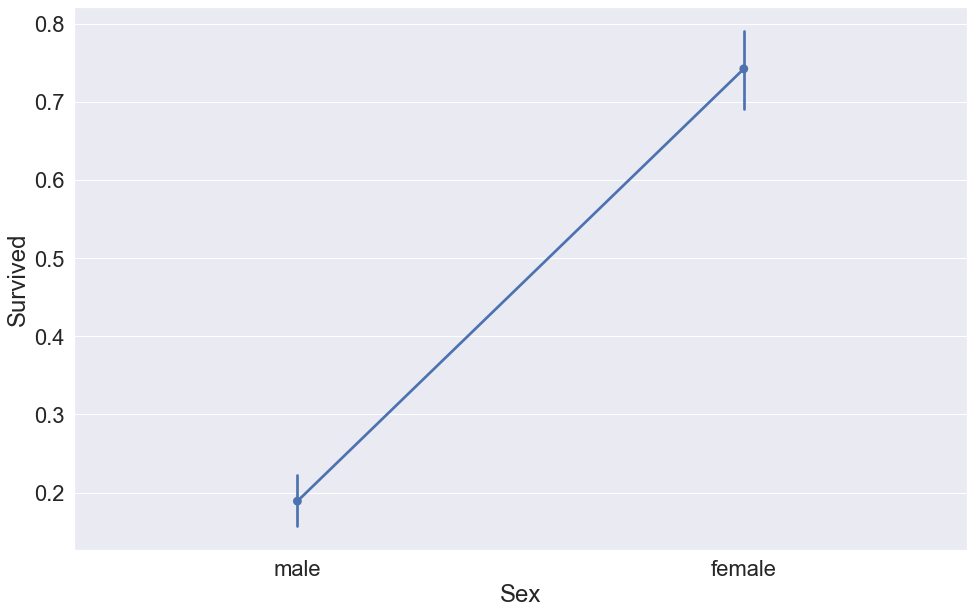

In [10]:
# Checking connection between sex and survived
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.Sex, y=train_df.Survived);

### Sex

This is another categorical feature, which consists two categories: male and female. I dealt with this feature the same way I did with P-class. I have created a probability table and plotted it against the survived variable to check for interactions. The probability table shows a clear majority of Male samples. I will still say that this dataset is balanced because I still have over 35% Female samples. 

The point plot shows a clear interaction between the two features. It turns out the females had approx. 75% chances of survival, while males only had about 20%. It makes sense, since online sources mentioned that they loaded children and women first to the life boats, and men were last.

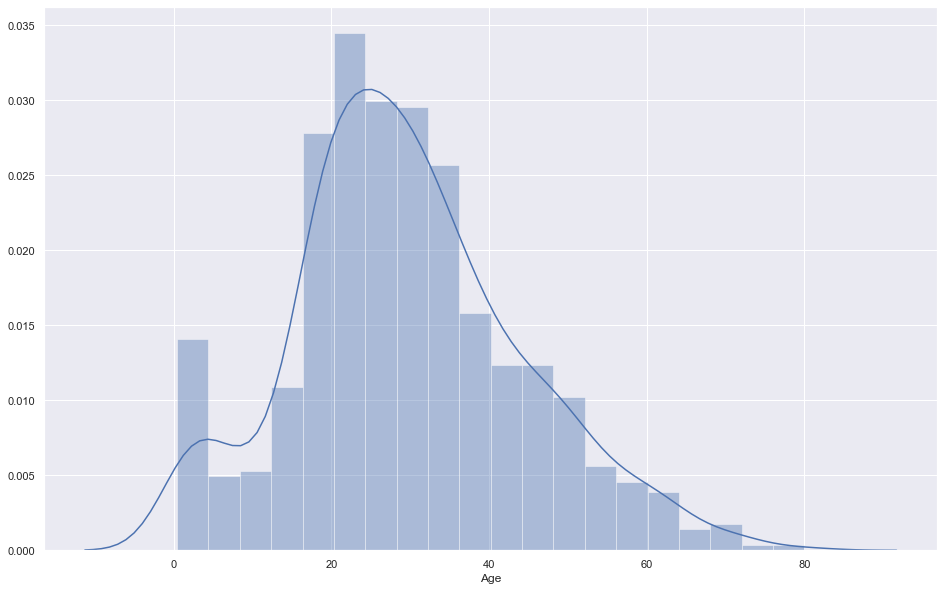

In [11]:
full_age = train_df["Age"].dropna()
sns.set()
sns.distplot(full_age)

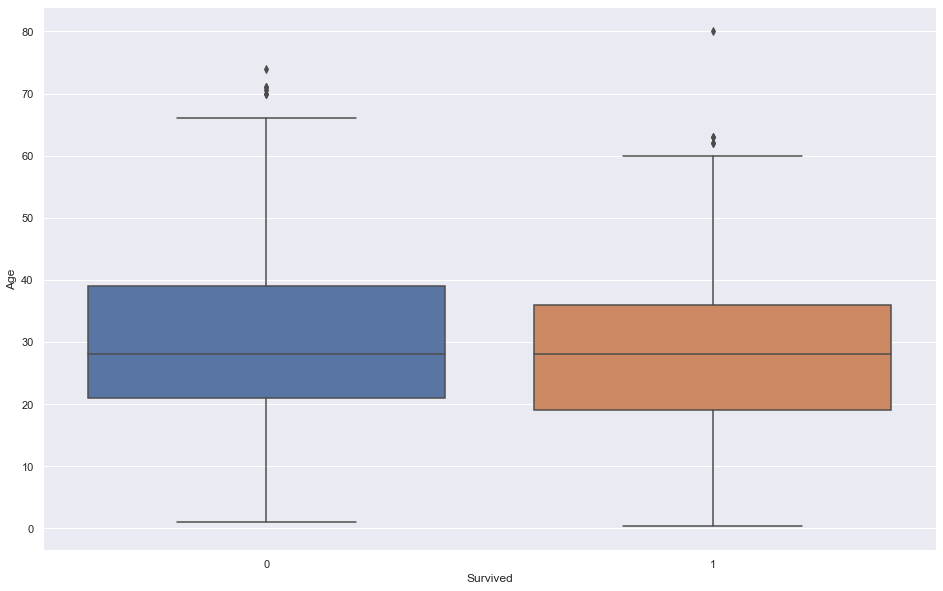

In [12]:
survived_where_age_is_available = train_df.loc[train_df.Age.notnull()]
plt.figure(figsize=(16, 10))
sns.boxplot(x=survived_where_age_is_available.Survived, y=full_age)

### Age

Age is a numeric feature that describes the entity's age. To view it's distribution I've created a distplot. We can see that the age of the passengers is distributed in a somewhat normal form. The mean of the distribution should be around mid-20s. One reservation is that there is a pretty significant left tale to the distribution. Using the histogram, we can see that it is caused by a large amount of '0' values. We can guess that it can happen due to neither many infants which were classified as having the age of '0', or by having missing values in the data that were classified as '0'.


I have also created a boxplot, where we can see that there is no clear connection between Age and Survived. While the lower three quartiles of the data look alike, there is some difference at the fourth one. All the samples over 60 in the "Survived" category are already classified is outliers. 

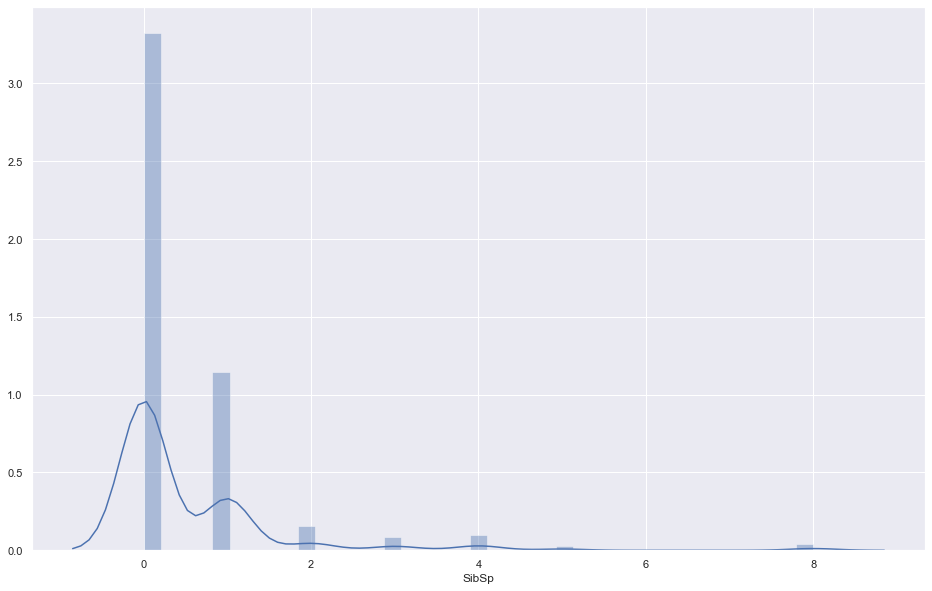

In [13]:
sns.set()
plt.figure(figsize=(16, 10))
sns.distplot(train_df.SibSp)

In [14]:
sibsp_df = pd.DataFrame({"Label": ["0","1","2","3"], "Count": [list(train_df['SibSp']).count(0), list(train_df['SibSp']).count(1), list(train_df['SibSp']).count(2), list(train_df['SibSp']).count(3)]})
sibsp_df.loc[4] = ["Over 3", len(list(train_df['SibSp'])) - sibsp_df['Count'].sum()]
sibsp_df['Probability'] = (list(sibsp_df['Count'])[0]/sum(list(sibsp_df['Count'])), list(sibsp_df['Count'])[1]/sum(list(sibsp_df['Count'])), list(sibsp_df['Count'])[2]/sum(list(sibsp_df['Count'])),list(sibsp_df['Count'])[3]/sum(list(sibsp_df['Count'])),list(sibsp_df['Count'])[4]/sum(list(sibsp_df['Count'])))

sibsp_df

,Label,Count,Probability
0,0,608,0.682379
1,1,209,0.234568
2,2,28,0.031425
3,3,16,0.017957
4,Over 3,30,0.033670


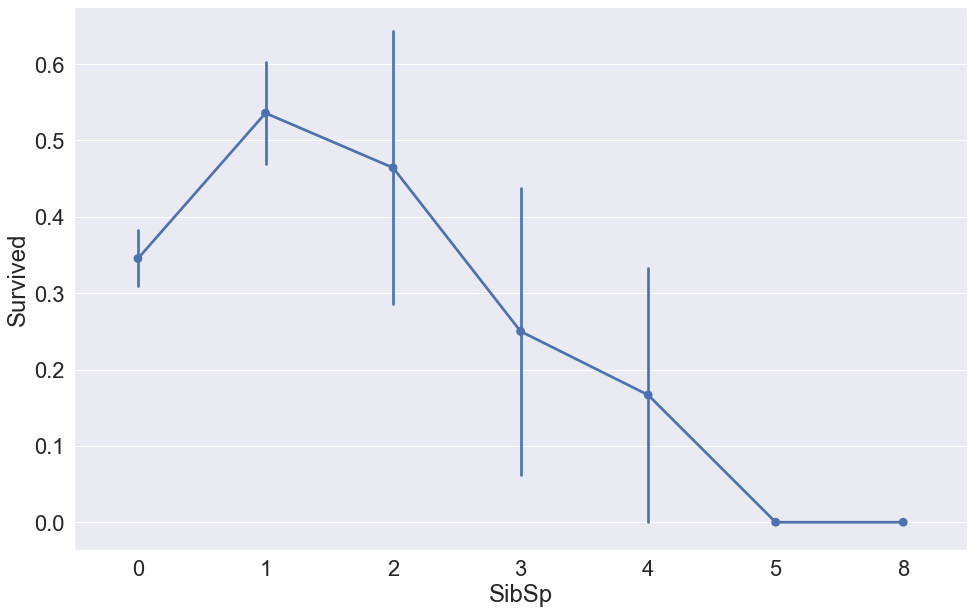

In [15]:
# Checking connection between number of siblings to survivor
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.SibSp, y=train_df.Survived);

### SibSp

SibSp is the number of siblings / spouses aboard the titanic. Though this is a numerical feature, it only received low and discrete values. Therefore, I treated it as if it was a categorical feature. Essentially, I did some aggregations and formed the following probability table:
We can see here that nearly 70% of the passengers travelled with no siblings /spouses at all, and another 23% travelled with one of them. Overall, over 90% of the entities are covered by those two. This means that this feature is <b>imbalanced</b>. 

This plot shows the chances of survival as a function of the number of siblings. It shows an interesting connection – It seems like the best chances of survival come when you travel with one spouse. As for the other values, we see a large amount of uncertainty around the estimator, so I wouldn't jump into further conclusions.

In [16]:
parch_df = pd.DataFrame({"Label": ["0","1","2","3"], "Count": [list(train_df['Parch']).count(0), list(train_df['Parch']).count(1), list(train_df['Parch']).count(2), list(train_df['Parch']).count(3)]})
parch_df.loc[4] = ["Over 3", len(list(train_df['Parch'])) - parch_df['Count'].sum()]
parch_df['Probability'] = (list(parch_df['Count'])[0]/sum(list(parch_df['Count'])), list(parch_df['Count'])[1]/sum(list(parch_df['Count'])), list(parch_df['Count'])[2]/sum(list(parch_df['Count'])),list(parch_df['Count'])[3]/sum(list(parch_df['Count'])),list(parch_df['Count'])[4]/sum(list(parch_df['Count'])))

parch_df

,Label,Count,Probability
0,0,678,0.760943
1,1,118,0.132435
2,2,80,0.089787
3,3,5,0.005612
4,Over 3,10,0.011223


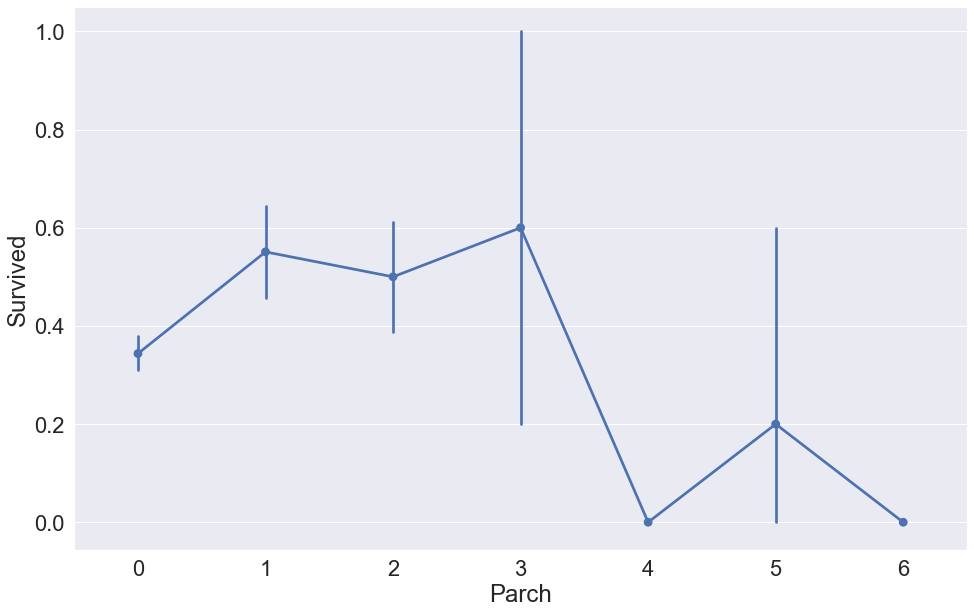

In [17]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.Parch, y=train_df.Survived);

### Parch

Parch stands for the number of parents / children aboard the titanic. It is pretty similar to the previous feature in the sense that it is of discrete numerical values. Therefore, I treated it the same way. We can see that this feature acts in a similar way to the "SibSp" feature. They also have a similar meaning, so we might want to find a new feature to represent the two. 


In [18]:
train_df.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

### Ticket

'Ticket' feature represenets the reservation code for each passenger. Obviously, the describe() function shows that the data is really sparse, and we won't be able to reach any conclusions based on the actual values of the ticket reservations, since we have at most seven samples for each ticket code. Therefore, I have decided to transform it so it will represent the number of tickets registered under the same reservation. While I expect it to have high correlation with the "family" features, I believe that this feature will be more informative for the model.

In [19]:
train_df['Ticket'] = train_df['Ticket'].map(train_df['Ticket'].value_counts()).astype('int64')

print(train_df['Ticket'].value_counts())

ticket_df = pd.DataFrame({"Label": ["1", "2"], "Count": [list(train_df['Ticket']).count(1), list(train_df['Ticket']).count(2)]})
ticket_df.loc[2] = ["Over 2", len(list(train_df['Ticket'])) - ticket_df['Count'].sum()]
ticket_df['Probability'] = (list(ticket_df['Count'])[0]/sum(list(ticket_df['Count'])), list(ticket_df['Count'])[1]/sum(list(ticket_df['Count'])), list(ticket_df['Count'])[2]/sum(list(ticket_df['Count'])))
ticket_df

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Ticket, dtype: int64


,Label,Count,Probability
0,1,547,0.613917
1,2,188,0.210999
2,Over 2,156,0.175084


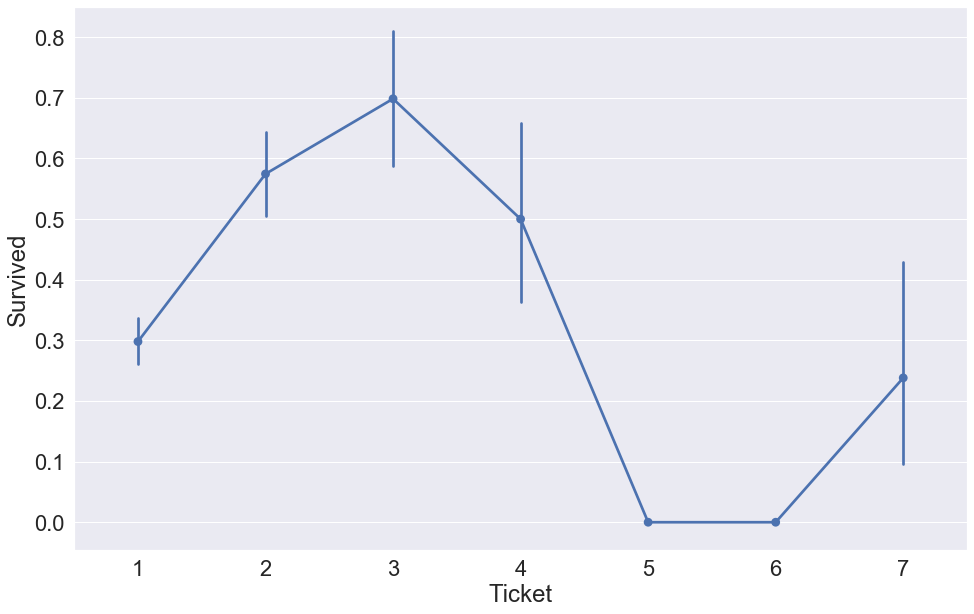

In [20]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.Ticket, y=train_df.Survived);

As expected, we can see that "Ticket" acts in a very similar way to "Parch" and "SibSp". Majority of the people had a single ticket in their reservation. We can also see that we have an increase in the survival rate once you have more people on your reservation. It doesn't go far because we don't have high level of certainty for over 4 people in one reservation.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

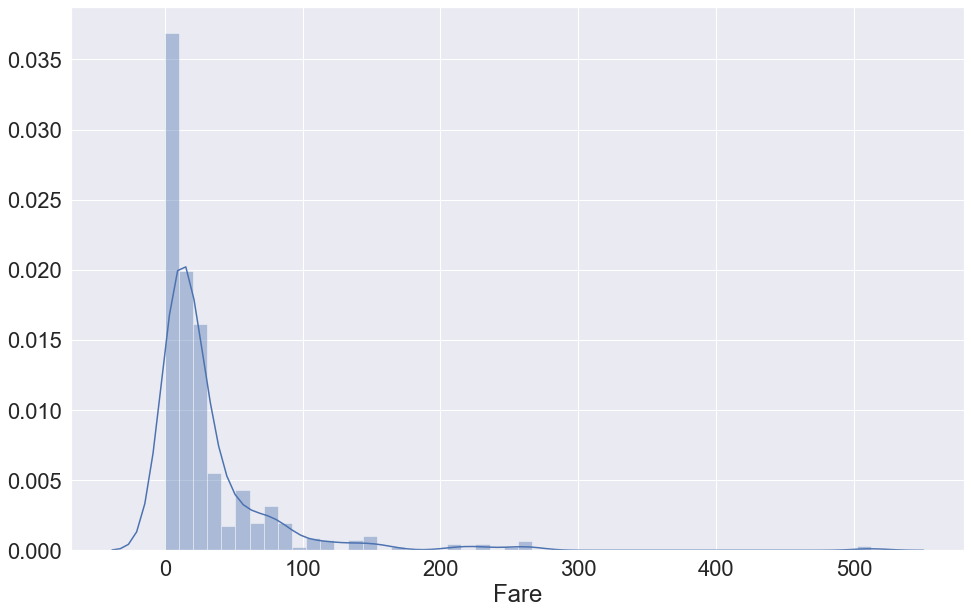

In [21]:
sns.set()
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.distplot(train_df.Fare)
train_df.Fare.describe()

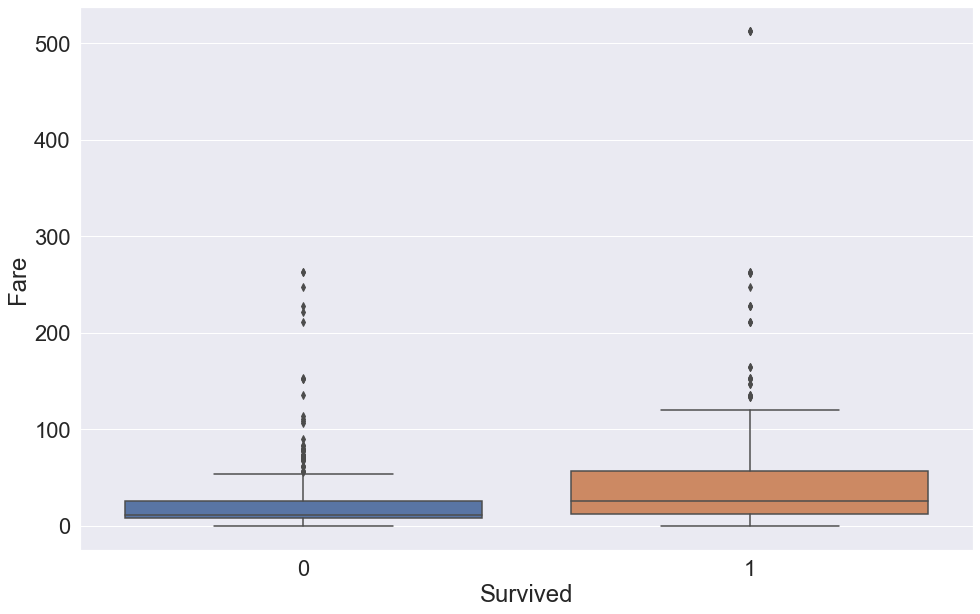

In [22]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.boxplot(x=train_df.Survived, y=train_df.Fare)

Non-outlier observations: 838


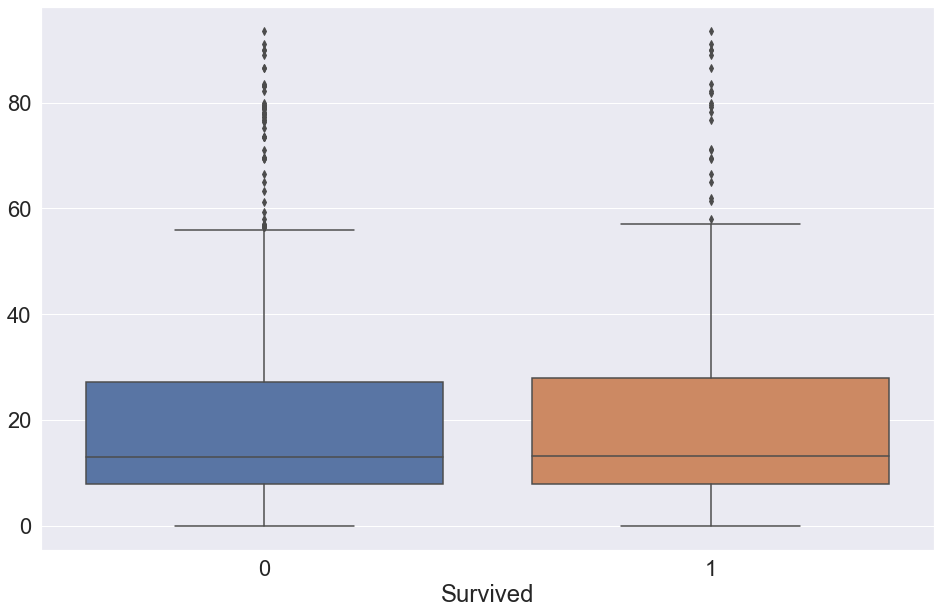

In [23]:
# dealing with outliers
q25, q75 = np.percentile(train_df.Fare, 25), np.percentile(train_df.Fare, 75)
iqr = q75-q25
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in train_df.Fare if x < lower or x > upper]
fare_outliers_removed = [x for x in train_df.Fare if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(fare_outliers_removed))
plt.figure(figsize=(16, 10))
sns.boxplot(x=train_df.Survived, y=fare_outliers_removed)

### Fare

This feature describes the price of each ticket bought by each passenger of the ship. This is a numerical feature, and therefore I have used both describe() and distplot to analyze it. Both tools suggested that there is a significant right tail to this distribution. We can see it through the description, where 75% percent of the data is below 31, and the maximum value is 512. This means that a small amount of entities bought some expansive tickets, which will probably create some outliers down the road. 

Then I have created a boxplot to see the intercation between fare and the survival rate. It showed that there is a big number of outliers in the data which makes it difficult to reach any conclusion. Therefore, I have removed approximately 50 observations using the Interquantile Range method.  Afterwards I have plotted a boxplot again, and it showed no visible corellation between Fare and Survived.


In [24]:
train_df['Cabin'] = train_df['Cabin'].notnull().astype('int64')
cabin_df = pd.DataFrame({"Label": ["0","1"], "Count": [list(train_df['Cabin']).count(0), list(train_df['Cabin']).count(1)]})
cabin_df['Probability'] = (list(cabin_df['Count'])[0]/sum(list(cabin_df['Count'])), list(cabin_df['Count'])[1]/sum(list(cabin_df['Count'])))
cabin_df

,Label,Count,Probability
0,0,687,0.771044
1,1,204,0.228956


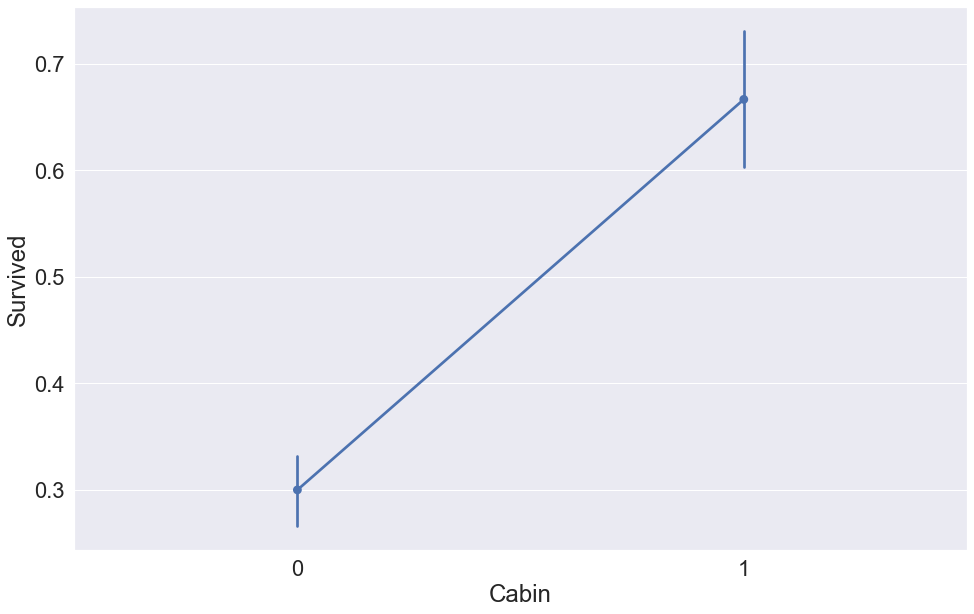

In [25]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.Cabin, y=train_df.Survived);

### Cabin

Cabin feature indicates on the cabin where the passenger stayed. The problem with this feature was that most of the values of it are missing. I have decided to turn it so it means whether there was information on the cabin of the entity or not. As the pointplot suggests, we can see a strong connection between the existance of such information and the survival rate. It makes sense, becuase people who survived the disaster were able to fill the gaps on where they stayed.

In [26]:
embarked_df = pd.DataFrame(columns=['Label','Count','Probability'])
embarked_df['Label'] = ("Cherbourg", "Queenstown", "Southampton")
embarked_df['Count'] = (list(train_df['Embarked']).count('C'), list(train_df['Embarked']).count('Q'), list(train_df['Embarked']).count('S'))
embarked_df['Probability'] = (list(embarked_df['Count'])[0]/sum(list(embarked_df['Count'])), list(embarked_df['Count'])[1]/sum(list(embarked_df['Count'])), list(embarked_df['Count'])[2]/sum(list(embarked_df['Count'])))
embarked_df

,Label,Count,Probability
0,Cherbourg,168,0.188976
1,Queenstown,77,0.086614
2,Southampton,644,0.724409


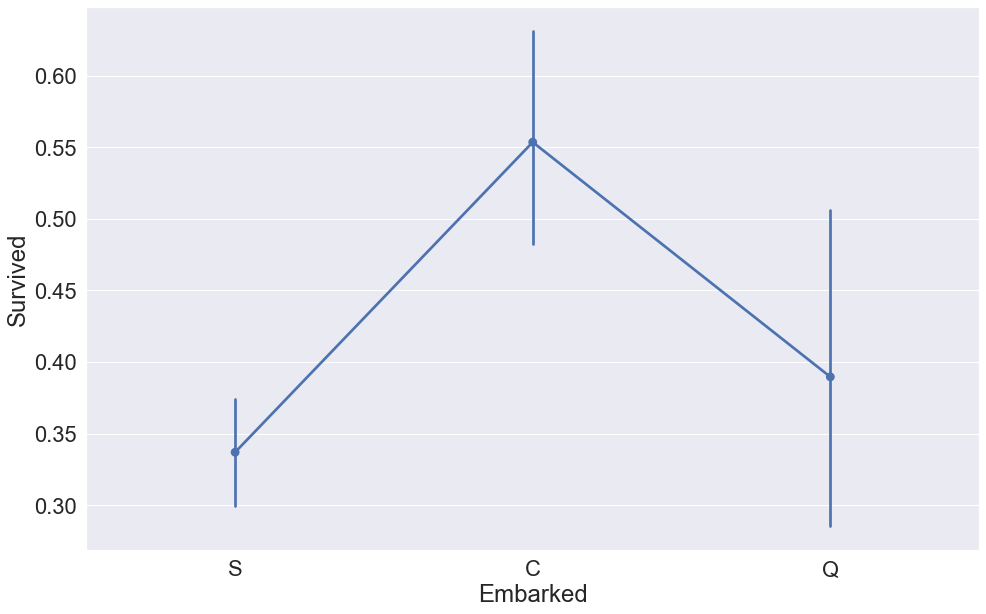

In [27]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.pointplot(x=train_df.Embarked, y=train_df.Survived);

### Embarked

This feature represents the port of embarkation to the ship. This is a categorical feature, and it can get one out of three possible values: 'C' stands for Cherbourg, 'Q' is for Queenstown, and 'S' is for Southampton. Once again, I have created a probability table. It shows yet again that the dataset is imbalanced. While 72% of the people embarked from Southampton, we have only 77 people who embarked at Queenstown.

As always, I have also created a point plot to visualize the interaction. Surprisingly enough, this plot shows a clear connection between embarking at Cherbourg and surviving. While we have little information on Queenstown, so that we cannot say anything conclusive regarding that, we can say that people that embarked in Southampton had significantly lower survival percentage.


### Summary

Now that we are done with exploring each feature individually, the next step would be performing feature engineering. Before I continue, I would like to make a brief summary on the main conclusions from this step:

1. There are missing values in the following features: Age, Embarked
2. There is a clear interaction between Pclass and Survived - the higher the class, up goes the survival rate
3. There is a high corellation between "Name" and "Sex", and when looking at the interaction of both with "Survived" we can definetly see that females have significantly higher survival chances.
4. There are a lot of observations where Age = 0. It could be referenced as a kind of a missing value, since it doesn't fit with the distribution of Age
5. SibSp and Parch behave in a similar manner, and both of them highly correlated with "Ticket".
6. There are outliers in Fare.
7. We see clear interaction between having information on cabin number, and survival rate.
8. Our dataset is imbalanced - we are missing observations on people that embarked in Queenstown
9. There is an interaction between Embarked and Survived - The people who embarked at Cherbourg clearly have higher survival chances than people who embarked at Southhampton


### Correlation Matrix and Feature Engineering

Before I will go on to presenting the correlation matrix, I will first deal with missing values and categorical features.


In [28]:
import copy

# Stands for Feature Engineering Train Data Frame
fet_df = copy.deepcopy(train_df)

# Looking for missing values
print("Survived " +str(len(fet_df.PassengerId[fet_df.Survived.isnull() == True].index)))
print("Pclass " +str(len(fet_df.PassengerId[fet_df.Pclass.isnull() == True].index)))
print("Name " +str(len(fet_df.PassengerId[fet_df.Name.isnull() == True].index)))
print("Sex " +str(len(fet_df.PassengerId[fet_df.Sex.isnull() == True].index)))
print("Age " +str(len(fet_df.PassengerId[fet_df.Age.isnull() == True].index)))
print("SibSp " +str(len(fet_df.PassengerId[fet_df.SibSp.isnull() == True].index)))
print("Parch " +str(len(fet_df.PassengerId[fet_df.Parch.isnull() == True].index)))
print("Ticket " +str(len(fet_df.PassengerId[fet_df.Ticket.isnull() == True].index)))
print("Fare " +str(len(fet_df.PassengerId[fet_df.Fare.isnull() == True].index)))
print("Cabin " +str(len(fet_df.PassengerId[fet_df.Cabin.isnull() == True].index)))
print("Embarked " +str(len(fet_df.PassengerId[fet_df.Embarked.isnull() == True].index)))



Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 0
Embarked 2


In [29]:

# Remove missing values of 'Embarked'
fet_df = fet_df[fet_df.Embarked.notnull()]
# Fill missing values with mean value
fet_df = fet_df.fillna(fet_df.Age.mean())

In [30]:
# Dealing with categorical features

# Encoding 'Sex' categorical data into a numeric columns
fet_df.loc[fet_df.Sex == 'male', 'Sex'] = 0
fet_df.loc[fet_df.Sex == 'female', 'Sex'] = 1
fet_df['Sex'].astype('int64')
# Encoding 'Embarked' and 'Name' categorical data using 'One Hot' method - get_dummies in pandas
fet_df = pd.get_dummies(fet_df, columns=['Embarked'], prefix = ['embarked'])
fet_df = pd.get_dummies(fet_df, columns=['Name'], prefix = ['name'])


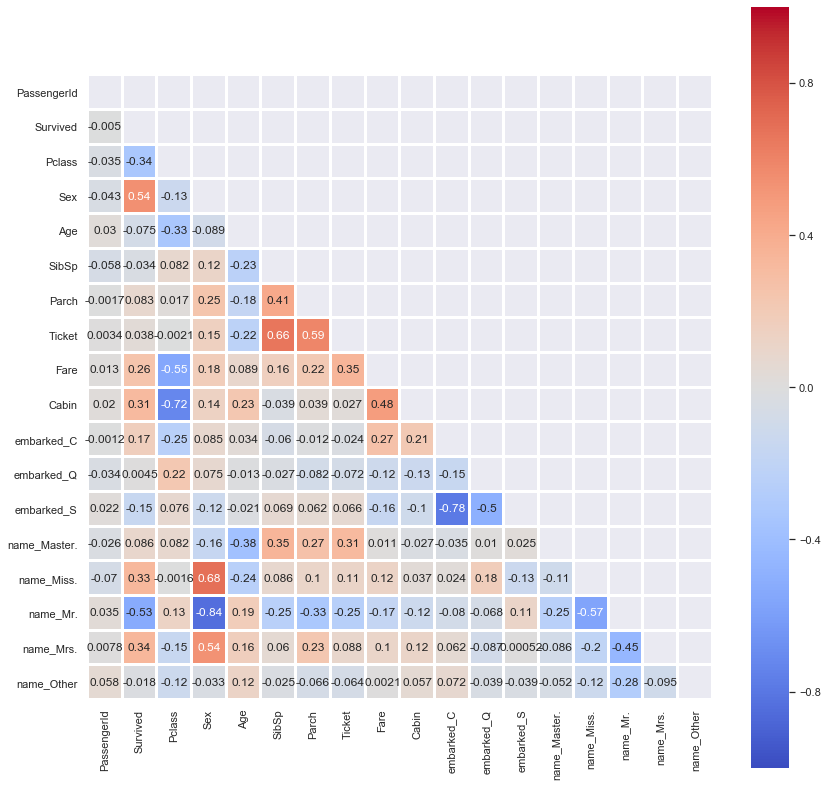

In [31]:
plt.figure(figsize=(14, 14))
mask = np.zeros_like(fet_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1)
sns.heatmap(fet_df.corr(),
            vmin=-1,
            linewidths=2,
            cmap='coolwarm',
            annot=True,
           square=True,
           mask=mask);

While this matrix suggests a lot of ideas for transformation of the data, I would like to focus on the one that is neccesary the most. We can see low correlation between "SibSp" and "Parch" to "Survived", while both of them has high correlation with each other and with "Ticket". Let's perform the following transformation before we move on to training models:
$$Family Ticket = \frac{Parch + SibSp}{Ticket}$$


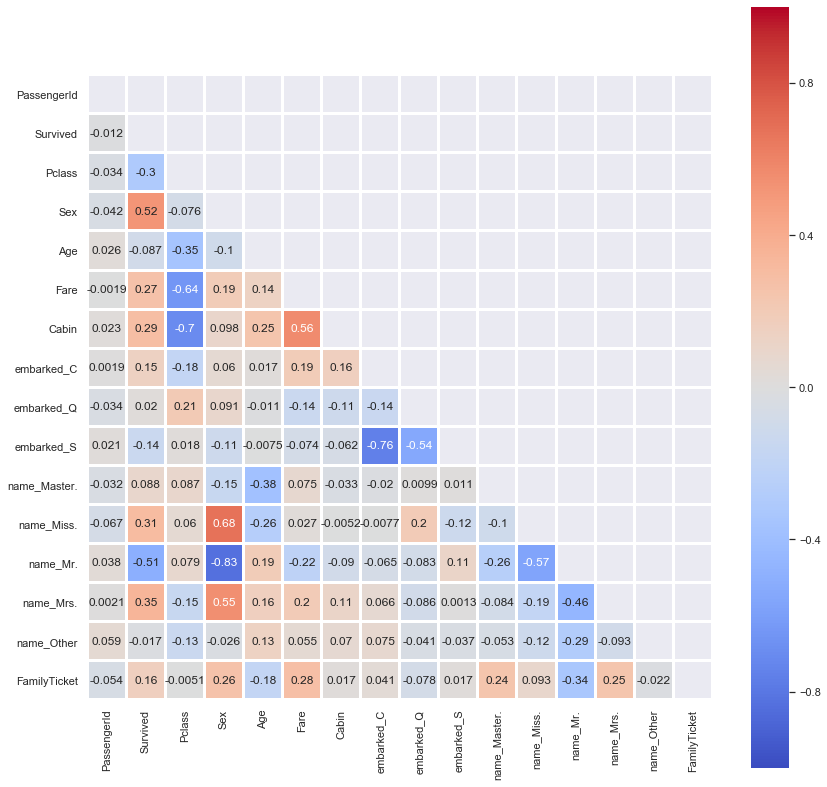

In [32]:
# Finding a transformation for the features that doesn't fit the model
fet_df['FamilyTicket'] = fet_df.apply(lambda row: (row.Parch + row.SibSp) / row.Ticket, axis=1)

fet_df = fet_df.drop('Parch', axis=1)
fet_df = fet_df.drop('SibSp', axis=1)
fet_df = fet_df.drop('Ticket', axis=1)

# Taking off outliers of Fare
q25, q75 = np.percentile(fet_df.Fare, 25), np.percentile(fet_df.Fare, 75)
iqr = q75-q25
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
mask = (fet_df['Fare'] < lower) | (fet_df['Fare'] > upper)
fet_df = fet_df[~mask]

plt.figure(figsize=(14,14))
mask = np.zeros_like(fet_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1)
sns.heatmap(fet_df.corr(),
            vmin=-1,
            linewidths=2,
            cmap='coolwarm',
            annot=True,
           square=True,
           mask=mask);

This looks better. We still have really high correlations between "Sex" and "Name" categories. Let's take a look at the option of removing the "Sex" feature, and split the "Other" and "Master" category by gender.

In [33]:
master_df = fet_df.loc[fet_df['name_Master.'] == 1]
print("Samples where name is Master")
print(master_df.Sex.value_counts())

other_df = fet_df.loc[fet_df['name_Other'] == 1]
print("Samples where name is Other")
print(other_df.Sex.value_counts())

Samples where name is Master
0    38
Name: Sex, dtype: int64
Samples where name is Other
0    33
1    13
Name: Sex, dtype: int64


We can see that "Sex" basically only differentiates between samples in "Other", so we will remove "Sex" feature from our model.

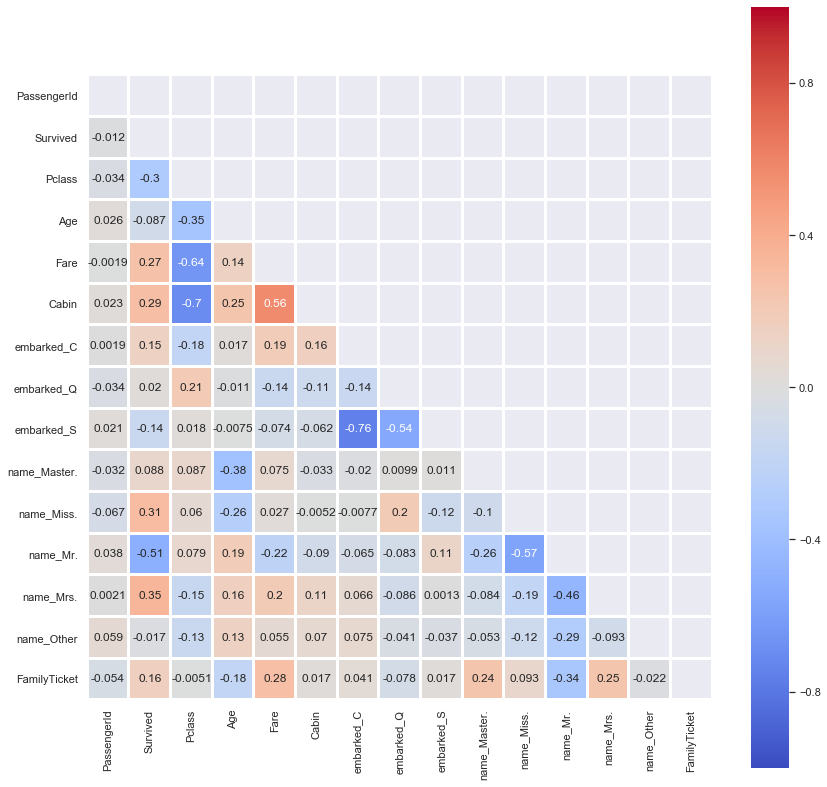

In [34]:
# Removing 'Sex' feature
fet_df = fet_df.drop('Sex', axis=1)

plt.figure(figsize=(14,14))
mask = np.zeros_like(fet_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1)
sns.heatmap(fet_df.corr(),
            vmin=-1,
            linewidths=2,
            cmap='coolwarm',
            annot=True,
           square=True,
           mask=mask);

Now I want to handle the high correlation between "Fare", "Cabin" and "PClass". I can suspect that I might have multicolinearity in my data. Let's test it using VIF test.

#### VIF Test

VIF is also known as "Variable Inflation Factor" and it It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It can be calculated in three simple steps:

1. For each independent variable, fit a linear regression model as a function of all the other explanatory variables.
2. the VIF value would be:
$$VIF = \frac{1}{1-R^2}$$
3. If the VIF value is larger than 2.5, than we have multicollinearity in our model.




In [35]:
def vif_cal(input_data, dependant_col):
    from sklearn.linear_model import LinearRegression
    x_vars = input_data.drop(dependant_col, axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = LinearRegression().fit(x,y).score(x,y)
        vif = 1/(1-rsq)
        print(xvar_names[i]+ ' VIF: ' +str(vif))


In [36]:

vif_cal(fet_df, "Survived")

PassengerId VIF: 1.0116036675212527
Pclass VIF: 2.745554006829121
Age VIF: 1.5330621081126268
Fare VIF: 2.1123099640753766
Cabin VIF: 2.080457127540425
embarked_C VIF: inf
embarked_Q VIF: inf
embarked_S VIF: inf
name_Master. VIF: inf
name_Miss. VIF: inf
name_Mr. VIF: inf
name_Mrs. VIF: inf
name_Other VIF: inf
FamilyTicket VIF: 1.3403038018570281


c:\users\tomha\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\users\tomha\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\users\tomha\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\users\tomha\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\users\tomha\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\users\tomha\appdata\local\programs\python\pytho

We can see that obviously VIF is extremely high for all categorical features that I spreaded using One Hot method. There is an exception as PClass VIF gets a value that is higher than 2.5. We can also see that 'Cabin' and 'Fare' gets also a rather high value. 

I can't think of a logic transformation of these three, so I'll try and do PCA on them. That is, Principal Component Analysis.

#### PCA

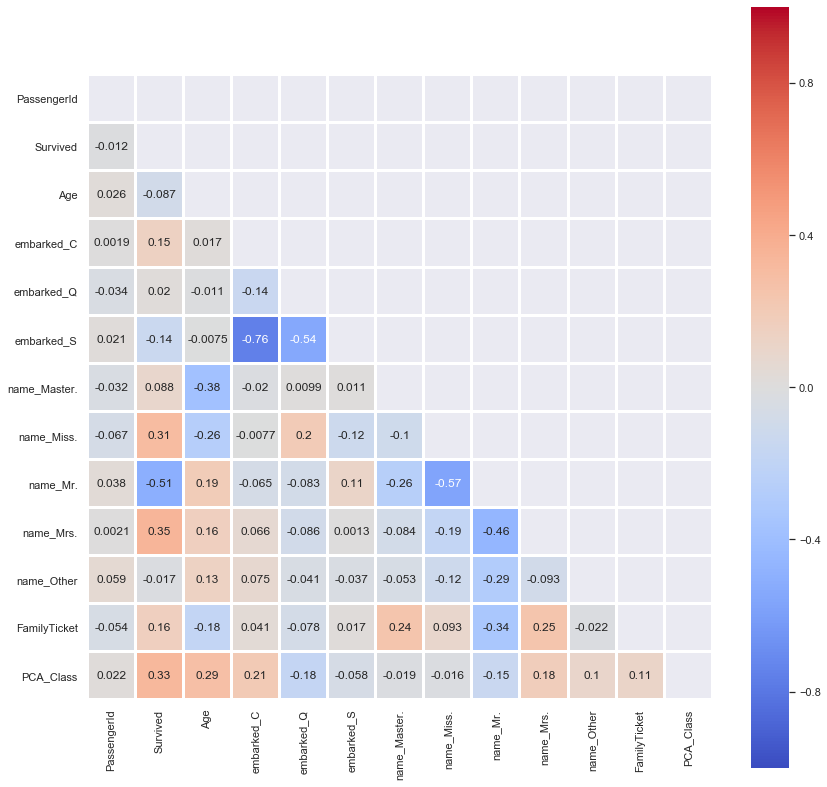

In [37]:
from sklearn.preprocessing import StandardScaler
x = fet_df.loc[:, ['Pclass', 'Cabin', 'Fare']].values
x = StandardScaler().fit_transform(x) # normalizing the features
x = pd.DataFrame(x)
from sklearn.decomposition import PCA
pca_class_model = PCA(n_components=1)
pca_class = pca_class_model.fit_transform(x)
fet_df['PCA_Class'] = pca_class

fet_df = fet_df.drop('Pclass', axis=1)
fet_df = fet_df.drop('Cabin', axis=1)
fet_df = fet_df.drop('Fare', axis=1)

plt.figure(figsize=(14,14))
mask = np.zeros_like(fet_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1)
sns.heatmap(fet_df.corr(),
            vmin=-1,
            linewidths=2,
            cmap='coolwarm',
            annot=True,
           square=True,
           mask=mask);

Looking at the matrix, the last thing i want to do is to squeeze back the three features that represent "embarked" into one variable with three possible values: 

1 - Means that the passenger has embarked at Cherbourg

0 - Means that the passenger has embarked at Queenstown

-1 - Means that the passenger has embarked at Southampton

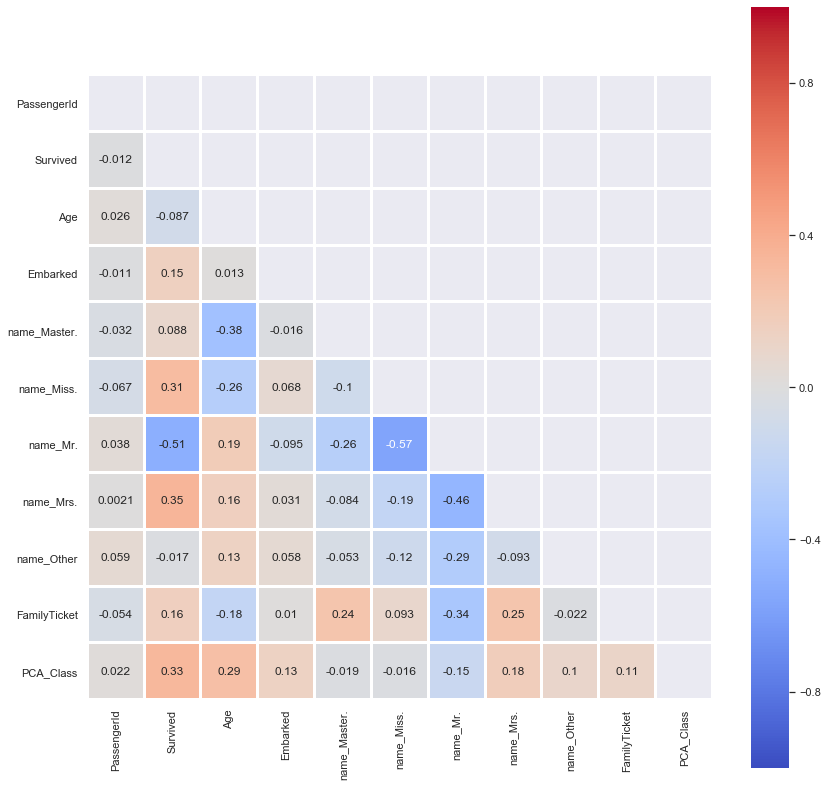

In [38]:
fet_df.loc[fet_df.embarked_S == 1, 'embarked_C'] = '-1'

fet_df = fet_df.rename(columns={'embarked_C': 'Embarked'})
fet_df = fet_df.drop('embarked_Q', axis=1)
fet_df = fet_df.drop('embarked_S', axis=1)

fet_df['Embarked'] = pd.to_numeric(fet_df.Embarked)

plt.figure(figsize=(14,14))
mask = np.zeros_like(fet_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1)
sns.heatmap(fet_df.corr(),
            vmin=-1,
            linewidths=2,
            cmap='coolwarm',
            annot=True,
           square=True,
           mask=mask);

Everything looks fine now. We are ready to carry on to the first model - <b>Logistic Regression.</b>